In [1]:
import numpy as np
import csv
import glob
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
#inline
plt.rcParams['figure.figsize'] = [14, 8]

from os import listdir
        
# content = content.decode('utf-8')         



# test_data = np.genfromtxt('./data_export_cobercat/data_export_1-2015.csv',skip_header=1,delimiter=',', dtype=None, names=['timestamp','date','lat','lng','signal_inst','signal_min','signal_max','signal_avg','carrier','fullCarrier','status','net','net_type','lac','cid','psc','speed,satellites','precision1','provider','activity','incident','downloadSpeed','uploadSpeed'],filling_values=(-1))
#data location
# unix = "./data_export_cobercat/data_export_1-2015.csv"

In [2]:
class cell_user:
    '''Holds data for each user'''
    
    def __init__(self, inpu):
        self.timestamp = int(inpu[0])
#         self.date = inpu[1]
#         self.datetime = datetime.strptime(self.date, '%Y-%m-%d %H:%M:%S.%f')
#         self.datetime = datetime(self.timestamp)
        try:
            self.datetime = datetime.fromtimestamp(self.timestamp/1000.0)
        except:
            pass
        del self.timestamp
        self.lat = float(inpu[2])
        self.lng = float(inpu[3])
        self.signal_inst = int(inpu[4])
        self.signal_min = int(inpu[5])
        self.signal_max = int(inpu[6])
        self.signal_avg = int(inpu[7])
        self.carrier = unicode(inpu[8])
        self.fullCarrier = unicode(inpu[9])
        self.status = int(inpu[10])
            
#         self.status = int(inpu[10])
        self.net = int(inpu[11])
        self.net_type = inpu[12]
        self.lac = int(inpu[13])
        self.cid = int(inpu[14])
        self.psc = int(inpu[15])
        self.speed = float(inpu[16])
        self.satellites = int(inpu[17])
        self.precision1 = int(inpu[18])
        self.provider = inpu[19]
        self.activity = int(inpu[20])
        try:
            self.incident = inpu[21]
            if len(self.incident) == 0:
                self.incident = -1
            
        except:
            self.incident = -1
            
        try:
            self.downloadSpeed = inpu[22]
            self.uploadSpeed = inpu[23]
            
        except:
            self.downloadSpeed = -1
            self.uploadSpeed = -1
        
        
        
    def __str__(self):
        '''return the name upon str(object)'''
        return str(self.timestamp)


In [3]:
def average_attr(list_of_phones, attr):
    """averages that attribute in the list"""
    total = 0
    n = 0
    for x in list_of_phones:
#         try:
            attrStr = 'x.'+attr
            total += float(eval(attrStr))
            n += 1
        
#         except:
#             pass
    
    average = total/float(n)

    return average
    

In [4]:
def keys_and_incidences(list_of_phones, attr):
    """finds each key and the number of incidences"""
    key_incid = {}
    for x in list_of_phones:
        strEval = 'x.'+attr
        label = eval(strEval)
        try:
            key_incid[label] += 1
        
        except:
            key_incid[label] = 1
    


    return key_incid

In [5]:
def just_values(list_of_phones, attr):
    """finds each key and the number of incidences"""
    values = []
    for x in list_of_phones:
        strEval = 'x.'+attr
        value = eval(strEval)
        values.append(value)
    


    return values

In [6]:
def plot_bars(list_of_phones, attr,minimum = 0):
    """Plots each key with the number of incidences"""
    
    k_c = keys_and_incidences(list_of_phones, attr)
    k_c_cropped = {}
    for x in k_c.keys():
        if k_c[x] > minimum:
            k_c_cropped[x] = k_c[x]
    plt.bar(range(len(k_c_cropped)), k_c_cropped.values(), align='center')
    plt.xticks(rotation=90)
    plt.xticks(range(len(k_c_cropped)), k_c_cropped.keys())
    title = "Breakdown of "+str(attr)
    plt.title(title)
    plt.xlabel("Labels")
    plt.ylabel("Frequency")
    plt.show()

In [7]:
def plot_bar(dic,minimum = 0,xlab="Labels",ylab="Frequency",title="Breakdown"):
    """Plots each key with its value"""

    plt.bar(range(len(dic)), dic.values(), align='center')
    plt.xticks(rotation=90)
    plt.xticks(range(len(dic)), dic.keys())
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [8]:
def plot_hist(list_of_phones, attr):
    """Plots a histogram for that attribute"""
    
#     k_c = keys_and_incidences(list_of_phones, attr)
    values = just_values(list_of_phones,attr)
    
    n, bins, patches = plt.hist(values, 50, facecolor='green', alpha=0.75) #, normed=1
    
#     plt.bar(range(len(k_c)), k_c.values(), align='center')
#     plt.xticks(rotation=90)
#     plt.xticks(range(len(k_c)), k_c.keys())
    title = "Breakdown of "+str(attr)
    plt.title(title)
    xlab = "Value of "+attr
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.show()

In [9]:
def import_all_data(folder,pollingRate = 0):
    """Imports all the data from the folder"""
    searchTerm = folder + "*.csv"
    files = glob.glob(searchTerm)
    
    list_of_phone_data = []
    error_entries = []
    number_of_original_entries = 0
    
    for fil in files:
        phone_data = open(fil, "r")
        phone_data_reader = csv.reader(phone_data, delimiter=',')
#         phone_data_list = list(phone_data_reader)
        print fil
#         print len(list_of_phone_data)
        skip = True
        for x in phone_data_reader:
            if skip == True:
                skip=False
                continue
            
            else:
                try:
                    number_of_original_entries+= 1
                    if pollingRate != 0:
                        if (number_of_original_entries%pollingRate) == 0:
                            y = cell_user(x)
                            list_of_phone_data.append (y)

                    else:
                        y = cell_user(x)
                        list_of_phone_data.append (y)    


    #                 if len(list_of_phone_data)%100000 == 0:
    #                     print y.date
    #                     print y.datetime
                except:
                    error_entries.append(str(x))

                
        phone_data.close()
                
    print "Total valid entries: " , len(list_of_phone_data)
    print "Ratio of invalid entries:" , len(error_entries)/float(len(list_of_phone_data))
    
    return list_of_phone_data,error_entries

In [10]:
#Average signal per hour

def groupBy(lst, attr):
    """groups the objects in lst by attribute in a dictionary"""
    
    grouped = {}
    for x in lst:
        strEval = 'x.'+attr
        label = eval(strEval)
        try:
            grouped[label].append(x)
        
        except:
            grouped[label] = [x]
    


    return grouped

In [11]:
def averageOfDict(ip, attr):
    """averages a dictionary and prints the values found and returns a dictionary of the averages"""
    averages = {}
    for y in ip.keys():
        averages[y] = average_attr(ip[y],attr)
        print str(y) +" average = "+ str(averages[y])
        
    return averages

In [12]:
all_data = import_all_data("./data_export_cobercat/", pollingRate= 3)[0]

./data_export_cobercat/data_export_01-2015.csv
./data_export_cobercat/data_export_01-2016.csv
./data_export_cobercat/data_export_02-2015.csv
./data_export_cobercat/data_export_02-2016.csv
./data_export_cobercat/data_export_03-2015.csv
./data_export_cobercat/data_export_03-2016.csv
./data_export_cobercat/data_export_04-2015.csv
./data_export_cobercat/data_export_04-2016.csv
./data_export_cobercat/data_export_05-2015.csv
./data_export_cobercat/data_export_05-2016.csv
./data_export_cobercat/data_export_06-2015.csv
./data_export_cobercat/data_export_06-2016.csv
./data_export_cobercat/data_export_07-2015.csv
./data_export_cobercat/data_export_07-2016.csv
./data_export_cobercat/data_export_08-2015.csv
./data_export_cobercat/data_export_08-2016.csv
./data_export_cobercat/data_export_09-2015.csv
./data_export_cobercat/data_export_09-2016.csv
./data_export_cobercat/data_export_1-2015.csv
./data_export_cobercat/data_export_10-2015.csv
./data_export_cobercat/data_export_11-2015.csv
./data_export_

In [13]:
plot_bars(all_data,'fullCarrier', minimum=2000)

In [14]:
print len(all_data)

3215133


In [15]:
average_attr(all_data, "speed")

26.664624915983378

In [20]:
plt.axvline(x=26.7, linewidth=4)
plot_hist(all_data,"speed")

In [22]:
plot_bars(all_data, "activity")

In [23]:
#todo
plot_bars(all_data,'net_type')

In [27]:
# plot_bars(list_of_phone_data,'net_type')

In [28]:
# Next is to filter by data/maybe 
# n, bins, patches = plt.hist(all_data, 50, normed=1, facecolor='green', alpha=0.75)

In [29]:
# plt.close()
# plot_hist(list_of_phone_data,'speed')


In [24]:
# print all_data[-1].date

In [ ]:
# date_datetime = datetime.strptime(all_data[1].date, '%Y-%m-%d %H:%M:%S.%f')
# print date_datetime.timetuple()

In [31]:
# print average_attr(all_data,'datetime')
print datetime.strftime(all_data[-1].datetime,'%S')

22


In [15]:
plt.close()
plot_hist(all_data,'datetime.month')

In [33]:
# print all_data[-15000].date

In [13]:
plot_bars(all_data,'datetime.day')
plot_bars(all_data,'datetime.month')
plot_bars(all_data,'datetime.year')



In [17]:
# plt.close()
plot_bars(all_data,'datetime.hour')
plot_bars(all_data,'datetime.minute')


In [20]:
print "Average time is "+str(average_attr(all_data,'datetime.hour'))

Average time is 13.1481213996


In [37]:
print 13.0752419387-12

1.0752419387


In [21]:
print "Average signal = ",average_attr(all_data,'signal_avg')
print "Average minimum signal = ",average_attr(all_data,'signal_min')
print "Average maximum signal = ",average_attr(all_data,'signal_max')
print



Average signal =  13.4651714253
Average minimum signal =  10.8226278664
Average maximum signal =  18.0335345381


In [22]:
print "Average number of satelites = ",average_attr(all_data,'satellites')

Average number of satelites =  5.07598908039


In [23]:
sortedByTime = groupBy(all_data,'datetime.hour')

signal_by_time = {}
for y in sortedByTime.keys():
    signal_by_time[y] = average_attr(sortedByTime[y],'signal_avg')
    print signal_by_time[y]
    
    


13.5436080092
13.3762233933
13.2859632308
13.0534576239
12.9637407804
13.1104162595
13.580044977
13.7069439086
13.6093703761
13.2322232769
13.1712731651
13.287845673
13.3616850002
13.4557279931
13.60310229
13.3483930316
13.5722816876
13.6050310951
13.5679977708
13.5924002513
13.4802629867
13.5490566038
13.577755332
13.6866311996


In [26]:
# plt.close()
plot_bar(signal_by_time, title="Average signal against hour")
# plt.title("Average Signal by hour")

In [28]:
plt.close()
av_activity_by_hour = averageOfDict(sortedByTime,"activity")
# plt.title("Average activity by hour")
plot_bar(av_activity_by_hour,title="Average activity by hour",xlab="hour",ylab="Average Activity")

0 average = 2.00534270312
1 average = 2.06946820888
2 average = 2.08686939096
3 average = 1.9647103586
4 average = 1.55565565002
5 average = 1.11234610123
6 average = 1.06506728979
7 average = 1.29010785257
8 average = 1.39361397983
9 average = 1.51737282146
10 average = 1.56844820914
11 average = 1.56172834415
12 average = 1.56255874265
13 average = 1.5489816779
14 average = 1.47025189485
15 average = 1.48387834439
16 average = 1.45454910356
17 average = 1.48449697146
18 average = 1.5549396609
19 average = 1.62875276177
20 average = 1.69089521298
21 average = 1.86644607153
22 average = 1.88856299289
23 average = 1.89251187003


In [29]:
av_satelites_by_hour = averageOfDict(sortedByTime,"satellites")
# plt.title("Average activity by hour")
plt.close()
plot_bar(av_satelites_by_hour,title="Average satellites by hour",xlab="hour",ylab="Average satellites")


0 average = 3.6137851367
1 average = 3.73649989734
2 average = 3.50169905027
3 average = 3.60762865024
4 average = 4.44017791791
5 average = 4.84356068009
6 average = 5.12170139499
7 average = 5.38332863074
8 average = 5.23285500043
9 average = 5.20963507482
10 average = 5.21258545814
11 average = 5.23982878209
12 average = 5.18285062833
13 average = 5.13155754372
14 average = 5.15713220288
15 average = 5.17296738249
16 average = 5.2305235929
17 average = 5.14189988015
18 average = 5.05671660986
19 average = 4.9258978469
20 average = 4.74514923108
21 average = 4.38797521825
22 average = 4.15774445437
23 average = 4.06452720096


In [30]:
av_day_by_hour = averageOfDict(sortedByTime,"datetime.day")
# plt.title("Average activity by hour")
plt.close()
plot_bar(av_day_by_hour,title="Average day by hour",xlab="hour",ylab="Average day")


0 average = 15.8080958799
1 average = 16.1156662788
2 average = 15.8211205019
3 average = 15.9924854942
4 average = 15.4432745904
5 average = 15.3085548173
6 average = 15.452211954
7 average = 15.6344241433
8 average = 15.5307689607
9 average = 15.5081638629
10 average = 15.5342821516
11 average = 15.6210772872
12 average = 15.5371645142
13 average = 15.4674774408
14 average = 15.4388878932
15 average = 15.2821289732
16 average = 15.4761618054
17 average = 15.4873149678
18 average = 15.513681864
19 average = 15.5551433956
20 average = 15.5776600082
21 average = 15.5441002534
22 average = 15.5144322287
23 average = 15.7971797952


In [32]:
av_lat_by_hour = averageOfDict(sortedByTime,"lat")
# plt.title("Average activity by hour")
plt.close()
plot_bar(av_lat_by_hour,title="Average lattitude by hour",xlab="hour",ylab="Average lattitude")


0 average = 38.4697146284
1 average = 37.3763517028
2 average = 37.7647844611
3 average = 38.4781793912
4 average = 39.9599676871
5 average = 41.1623821832
6 average = 41.2913055044
7 average = 41.4716457875
8 average = 41.4699960547
9 average = 41.4372295342
10 average = 41.3602679162
11 average = 41.2019732079
12 average = 41.089106037
13 average = 40.9325974111
14 average = 40.8821438955
15 average = 40.9707593702
16 average = 41.0286893883
17 average = 41.0998212451
18 average = 41.1355017386
19 average = 40.9698993707
20 average = 40.6155263037
21 average = 40.0776735325
22 average = 39.6448001066
23 average = 39.6538923363


In [33]:
av_long_by_hour = averageOfDict(sortedByTime,"lng")
# plt.title("Average activity by hour")
plt.close()
plot_bar(av_long_by_hour,title="Average longitude by hour",xlab="hour",ylab="Average longitude")


0 average = -5.98852580622
1 average = -8.69709019027
2 average = -7.20110899538
3 average = -5.58852754209
4 average = -1.60494221947
5 average = 1.30403625073
6 average = 1.72506214721
7 average = 1.93733614702
8 average = 1.91580607891
9 average = 1.79864602157
10 average = 1.54096888223
11 average = 0.869887723528
12 average = 0.574504824642
13 average = 0.258269629381
14 average = -0.0457859802624
15 average = 0.0533337086564
16 average = 0.318488609535
17 average = 0.455057826863
18 average = 0.497428681671
19 average = -0.0299797231729
20 average = -1.22582817583
21 average = -3.10379549113
22 average = -4.42911049338
23 average = -3.73739092386


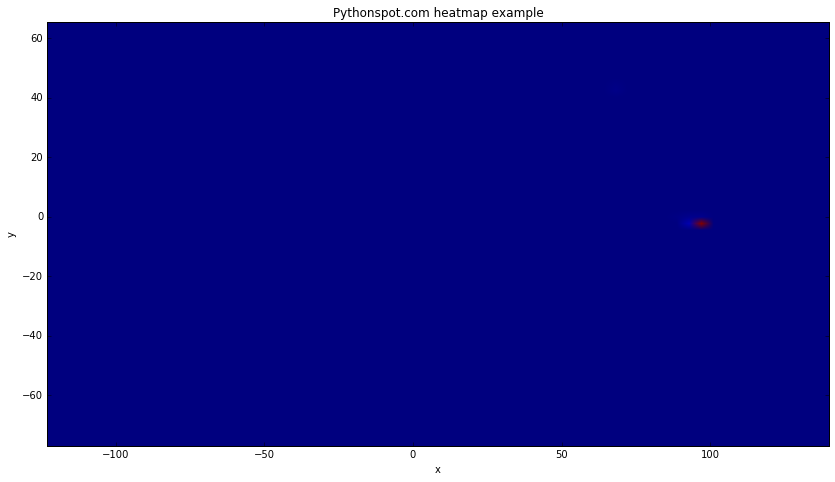

In [27]:
#heatmap
x=[]
y=[]
for q in all_data:
    try:
        y.append(q.lat)
        x.append(q.lng)
        
    except:
        pass





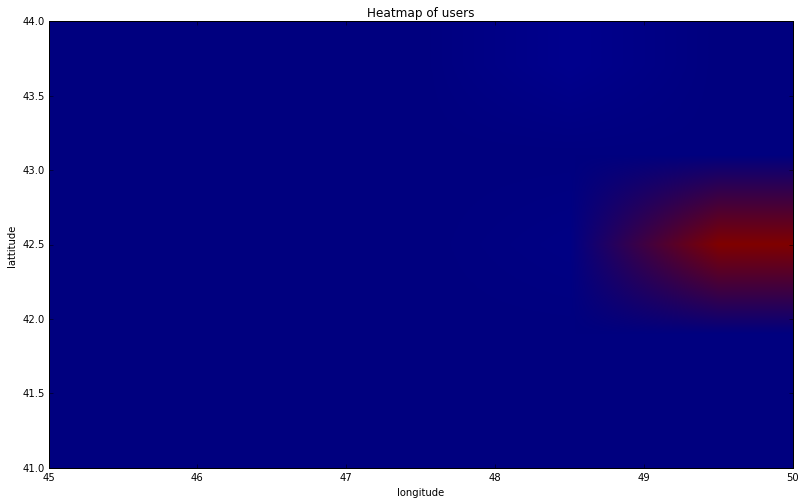

In [56]:
# ###### Create heatmap
# heatmap, xedges, yedges = np.histogram2d(x, y, bins=(5,5))
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
 
# # Plot heatmap
# plt.clf()
# plt.title('Heatmap of users')
# plt.ylabel('lattitude')
# plt.xlabel('longitude')
# plt.imshow(heatmap, extent=[45,50,41,44])
# plt.show()

4822632